Task 1: Data Preparation

In [ ]:
import pandas as pd
df = pd.read_csv('/content/Telco_Customer_Churn_Dataset .csv')

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Handle missing values
df = df.fillna(df.mean()) # fill NA values with mean
df = df.dropna() # drop rows with NA values

df.head()

<ipython-input-37-ca6c7464181e>:4: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean()) # fill NA values with mean


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
print(df.dtypes)
df.shape

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


(7043, 21)

In [ ]:
# Display summary statistics
print("\nSummary Statistics:")
df.describe()


Summary Statistics:


,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Column to one-hot encode
column_to_encode = 'Churn'

# Perform one-hot encoding
one_hot_encoded = pd.get_dummies(df[column_to_encode], prefix=column_to_encode)
df = pd.concat([df, one_hot_encoded], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_No,Churn_Yes
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,One year,No,Mailed check,56.95,1889.5,No,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0,1


In [ ]:
# Creating a new column with "yes" replaced by 1 and "no" replaced by 0
df["Churn_Yes_Num"] = df["Churn"].map({"Yes": 1, "No": 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_No,Churn_Yes,Churn_Yes_Num
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,One year,No,Mailed check,56.95,1889.5,No,1,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,1,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,1,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,One year,Yes,Mailed check,84.80,1990.5,No,1,0,0
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No,1,0,0
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,Month-to-month,Yes,Electronic check,29.60,346.45,No,1,0,0
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes,0,1,1


In [ ]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:", unique_values)

Unique values in customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Unique values in gender: ['Female' 'Male']
Unique values in SeniorCitizen: [0 1]
Unique values in Partner: ['Yes' 'No']
Unique values in Dependents: ['No' 'Yes']
Unique values in tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Unique values in PhoneService: ['No' 'Yes']
Unique values in MultipleLines: ['No phone service' 'No' 'Yes']
Unique values in InternetService: ['DSL' 'Fiber optic' 'No']
Unique values in OnlineSecurity: ['No' 'Yes' 'No internet service']
Unique values in OnlineBackup: ['Yes' 'No' 'No internet service']
Unique values in DeviceProtection: ['No' 'Yes' 'No internet service']
Unique values in TechSupport: ['No' 'Yes' 'No internet service']
Unique values in StreamingTV: ['No' '

In [ ]:
df.drop('TotalCharges', axis=1, inplace=True)

**Tasks 2: Exploratory Data Analysis (EDA)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Tenure')

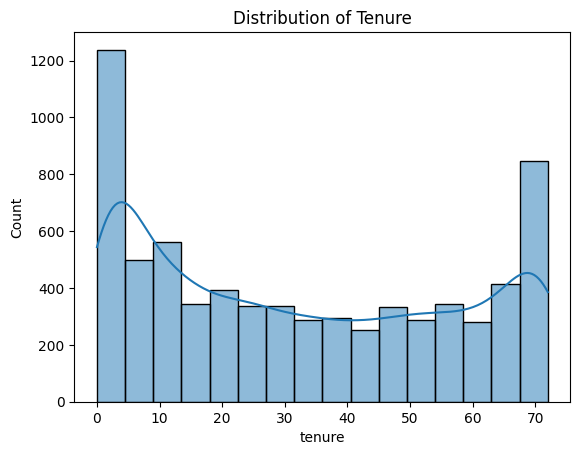

In [ ]:
fig, ax = plt.subplots()

# Tenure distribution
sns.histplot(df['tenure'],kde=True)
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Payment Method Distribution')

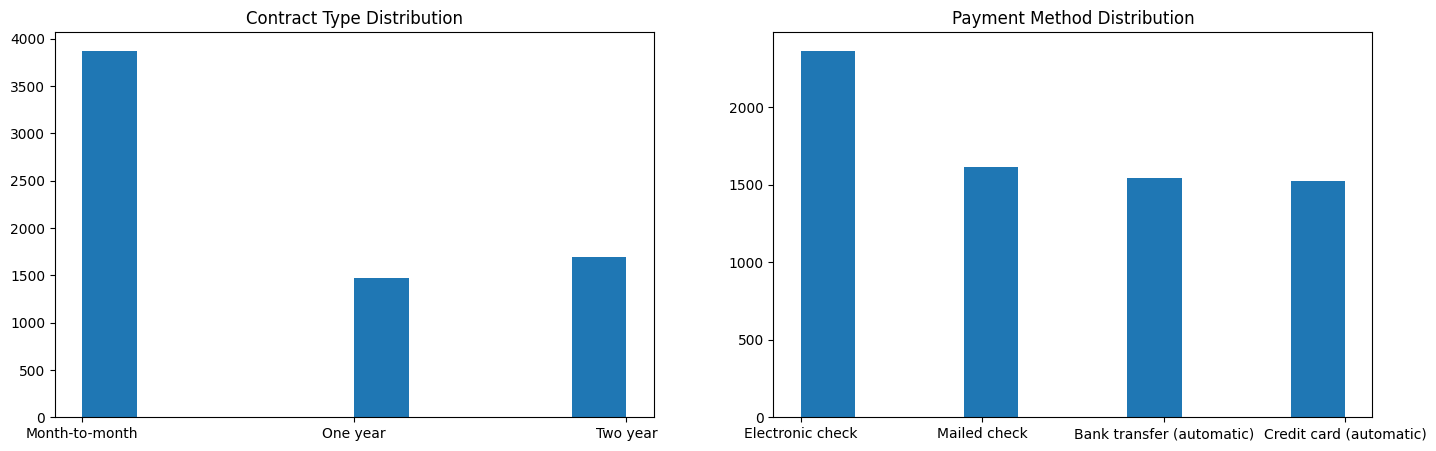

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(17,5))

axs[0].hist(df['Contract'])
axs[0].set_title("Contract Type Distribution")

axs[1].hist(df['PaymentMethod'])
axs[1].set_title("Payment Method Distribution")

Text(0.5, 1.0, 'Churn Distribution')

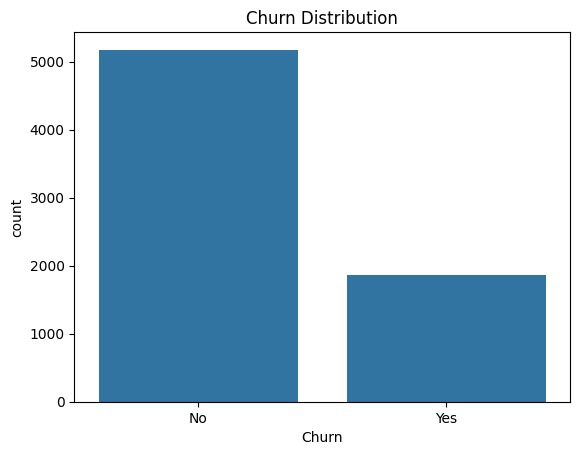

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

1. Line Chart:

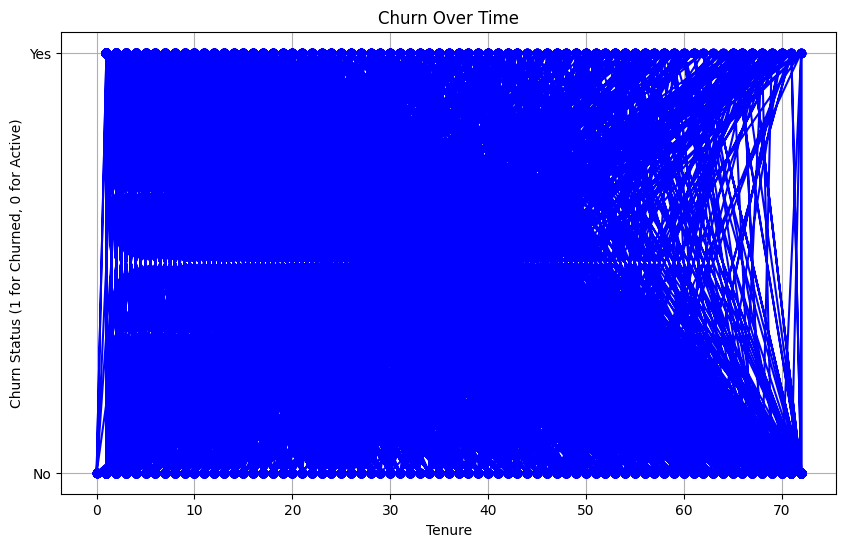

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df['tenure'], df['Churn'], marker='o', linestyle='-', color='b')
plt.title('Churn Over Time')
plt.xlabel('Tenure')
plt.ylabel('Churn Status (1 for Churned, 0 for Active)')
plt.grid(True)
plt.show()


2. Bar Chart:

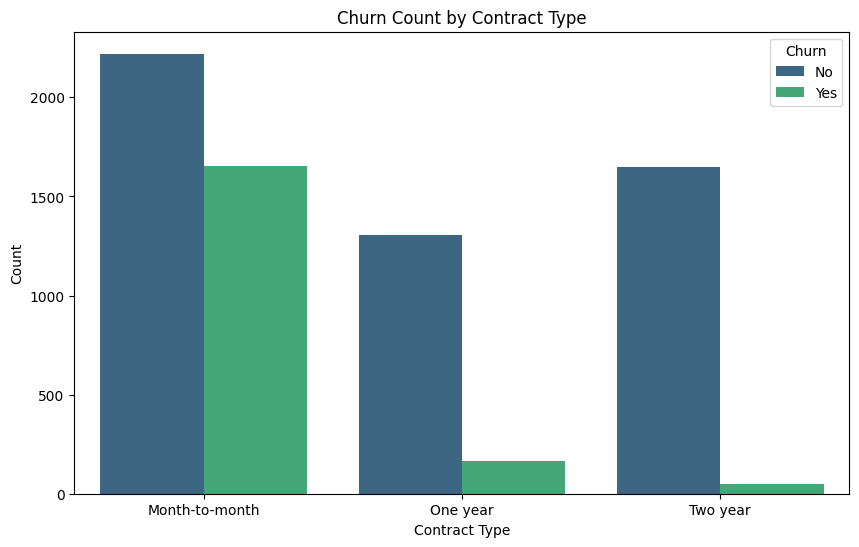

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=df, palette='viridis')
plt.title('Churn Count by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()


3. Pie Chart:


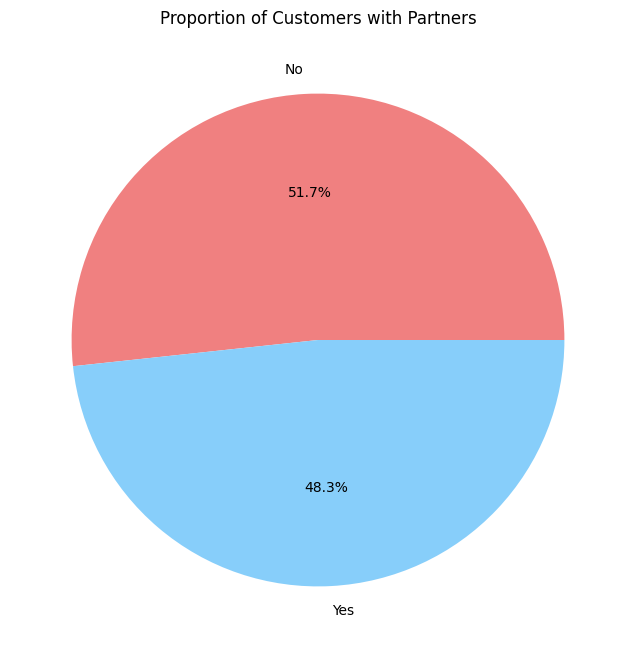

In [ ]:
plt.figure(figsize=(8, 8))
df['Partner'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Customers with Partners')
plt.ylabel('')
plt.show()


4. Heatmap:

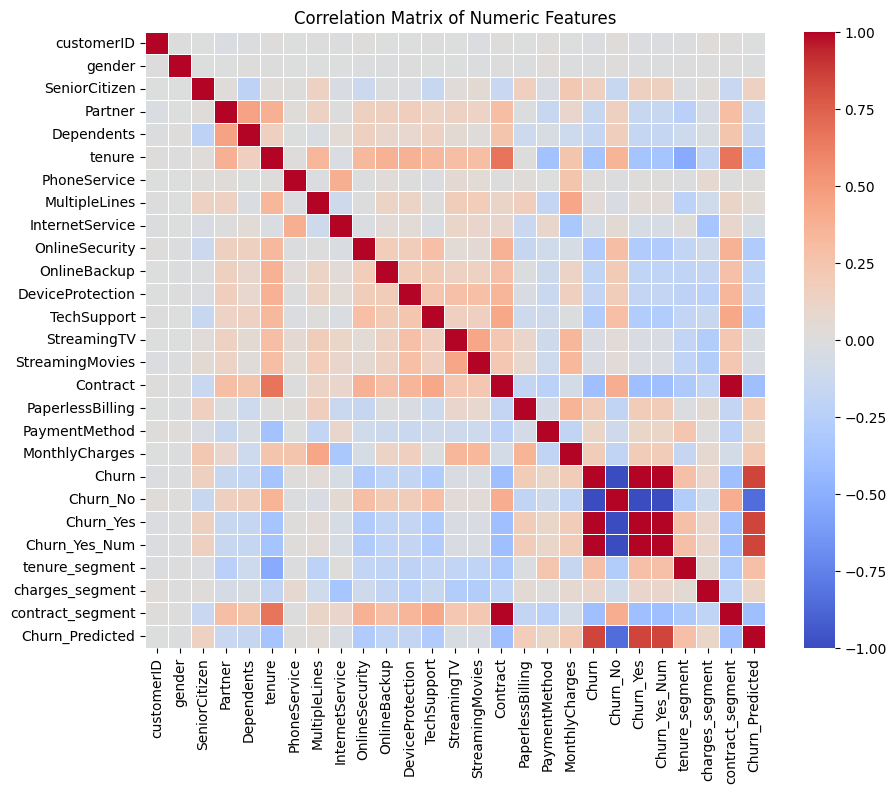

In [ ]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

5. Scatter Plot:

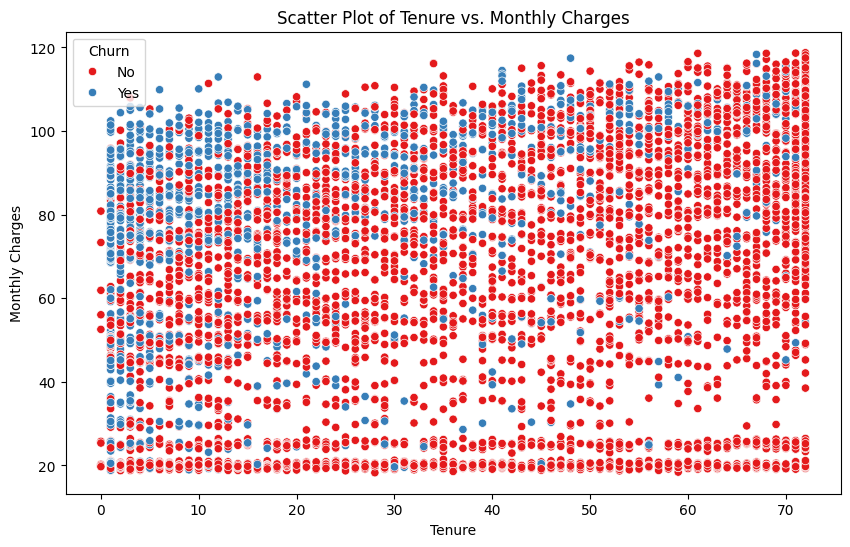

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=df, palette='Set1')
plt.title('Scatter Plot of Tenure vs. Monthly Charges')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.show()

6. Box Plot:

<ipython-input-54-7c814852d64b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Pastel1')


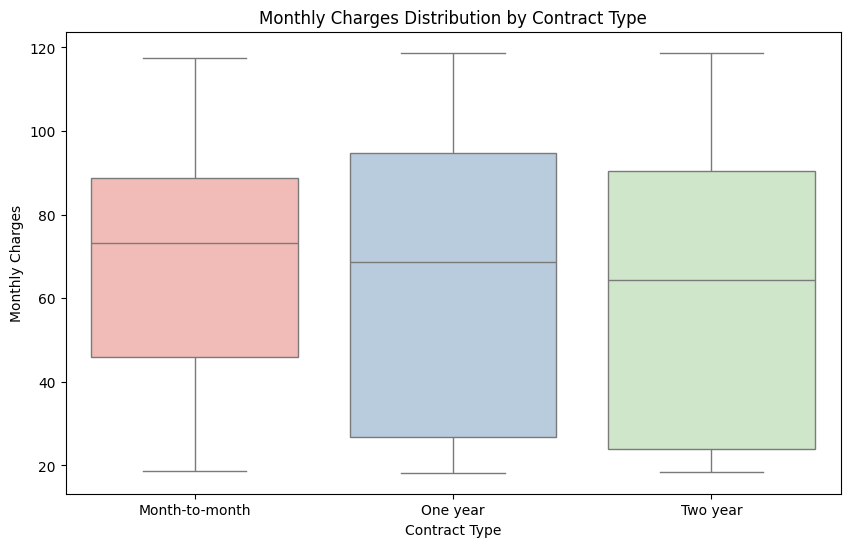

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Contract', y='MonthlyCharges', data=df, palette='Pastel1')
plt.title('Monthly Charges Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Monthly Charges')
plt.show()

7. Violin Plot:

<ipython-input-55-10ba9d744e14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')


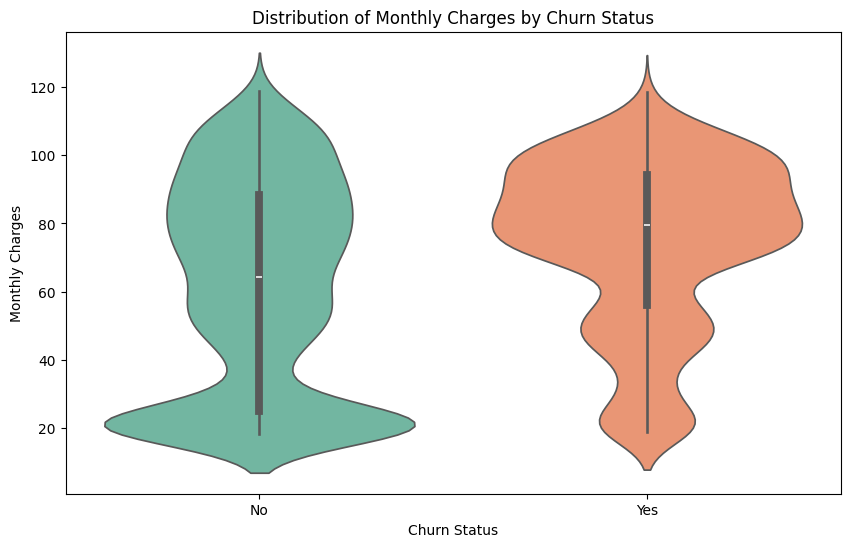

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Churn', y='MonthlyCharges', data=df, palette='Set2')
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Churn Status')
plt.ylabel('Monthly Charges')
plt.show()

8. Stacked Bar Chart:

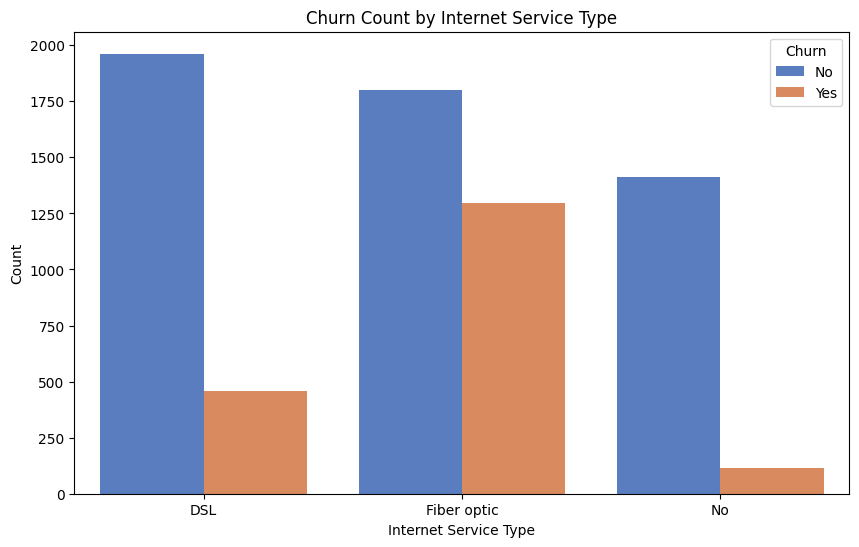

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='muted')
plt.title('Churn Count by Internet Service Type')
plt.xlabel('Internet Service Type')
plt.ylabel('Count')
plt.show()

In [ ]:
sum_variable = df['Churn_Yes_Num'].sum()
sum_variable

1869

In [ ]:

# Get the count of non-null values in the specified column
count_values = df['Churn_Yes_Num'].count()
count_values
total_no=count_values-sum_variable
total_no

5174

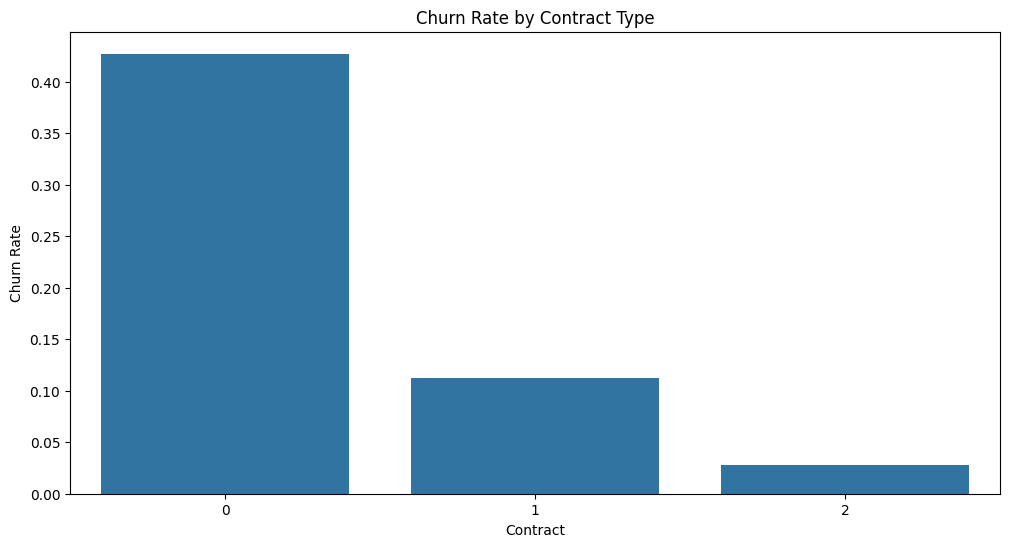

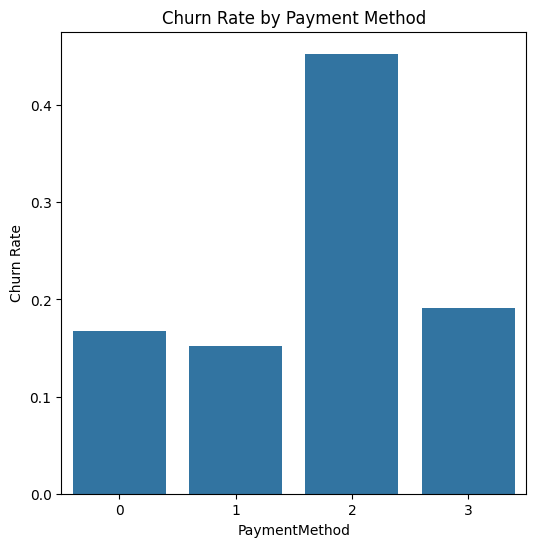

In [ ]:
# Group by 'Contract' and calculate churn rate
contract_churn = df.groupby('Contract')['Churn_Yes_Num'].mean()

# Group by 'PaymentMethod' and calculate churn rate
payment_churn = df.groupby('PaymentMethod')['Churn_Yes_Num'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x=contract_churn.index, y=contract_churn.values)
plt.title('Churn Rate by Contract Type')
plt.ylabel('Churn Rate')
plt.show()

plt.figure(figsize=(6, 6))
sns.barplot(x=payment_churn.index, y=payment_churn.values)
plt.title('Churn Rate by Payment Method')
plt.ylabel('Churn Rate')
plt.show()

**Tasks 3: Customer Segmentation**

In [ ]:
# 'Churn' with columns 'tenure', 'monthly_charges', and 'contract_type'

# Segment customers based on tenure
def segment_tenure(tenure):
    if tenure < 1:
        return 'New Customer'
    elif tenure >= 1 and tenure <= 3:
        return 'Mid-Term Customer'
    else:
        return 'Long-Term Customer'

df['tenure_segment'] = df['tenure'].apply(segment_tenure)

# Segment customers based on monthly charges
def segment_charges(charges):
    if charges < 50:
        return 'Low Charges'
    elif charges >= 50 and charges <= 100:
        return 'Medium Charges'
    else:
        return 'High Charges'

df['charges_segment'] = df['MonthlyCharges'].apply(segment_charges)

# Segment customers based on contract type
def segment_contract_type(contract_type):
    if contract_type == 'Month-to-month':
        return 'Month-to-Month Contract'
    elif contract_type == 'One year':
        return 'One-Year Contract'
    else:
        return 'Two-Year Contract'

df['contract_segment'] = df['Contract'].apply(segment_contract_type)

df[['tenure_segment', 'charges_segment', 'contract_segment']]
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,Churn_No,Churn_Yes,Churn_Yes_Num,tenure_segment,charges_segment,contract_segment
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,No,1,0,0,Mid-Term Customer,Low Charges,Month-to-Month Contract
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,No,1,0,0,Long-Term Customer,Medium Charges,One-Year Contract
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,Yes,0,1,1,Mid-Term Customer,Medium Charges,Month-to-Month Contract
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,No,1,0,0,Long-Term Customer,Low Charges,One-Year Contract
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,Yes,0,1,1,Mid-Term Customer,Medium Charges,Month-to-Month Contract
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Mailed check,84.80,No,1,0,0,Long-Term Customer,Medium Charges,One-Year Contract
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,Credit card (automatic),103.20,No,1,0,0,Long-Term Customer,High Charges,One-Year Contract
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,Yes,Electronic check,29.60,No,1,0,0,Long-Term Customer,Low Charges,Month-to-Month Contract
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,Yes,Mailed check,74.40,Yes,0,1,1,Long-Term Customer,Medium Charges,Month-to-Month Contract


In [ ]:
# Calculating churn rates for each segment
def calculate_churn_rate(segment):
    total_customers = len(segment)
    churned_customers = segment['Churn_Yes_Num'].sum()
    churn_rate = (churned_customers / total_customers) * 100
    return churn_rate

# Segment customers based on tenure
tenure_segment = df.groupby('tenure_segment')
tenure_churn_rate = tenure_segment.apply(calculate_churn_rate)

# Segment customers based on monthly charges
charges_segment = df.groupby('charges_segment')
charges_churn_rate = charges_segment.apply(calculate_churn_rate)

# Segment customers based on contract type
contract_segment = df.groupby('contract_segment')
contract_churn_rate = contract_segment.apply(calculate_churn_rate)

In [ ]:
customer_segments = df.groupby('tenure_segment')
segment_churn_rates = customer_segments.apply(calculate_churn_rate)

In [ ]:
def calculate_churn_rates(df):
    segments = define_segments(df)
    churn_rates = calculate_rates(segments)
    print_rates(churn_rates)

def define_segments(df):
    return df.groupby(['tenure_segment', 'charges_segment', 'contract_segment'])

def calculate_rates(segments):
    return segments.apply(calculate_churn_rate)

def print_rates(churn_rates):
    print(churn_rates)

In [ ]:
churn_rates = {
    'tenure': tenure_churn_rate,
    'charges': charges_churn_rate,
    'contract': contract_churn_rate
}
churn_rates

{'tenure': tenure_segment
 Long-Term Customer    21.267347
 Mid-Term Customer     56.803045
 New Customer           0.000000
 dtype: float64,
 'charges': charges_segment
 High Charges      28.048780
 Low Charges       15.736704
 Medium Charges    32.622823
 dtype: float64,
 'contract': contract_segment
 Month-to-Month Contract    42.709677
 One-Year Contract          11.269518
 Two-Year Contract           2.831858
 dtype: float64}

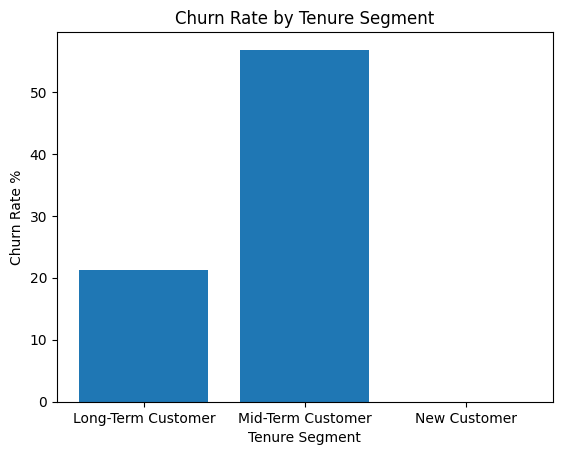

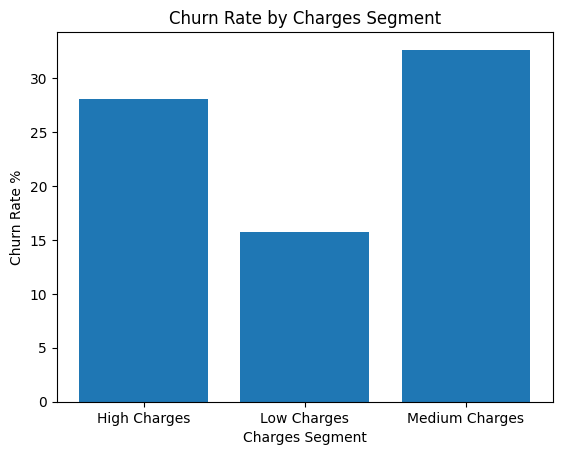

In [ ]:
tenure = churn_rates['tenure'].index.tolist()
tenure_rates = churn_rates['tenure'].values
charges = churn_rates['charges'].index.tolist()
charges_rates = churn_rates['charges'].values
contract = churn_rates['contract'].index.tolist()
contract_rates = churn_rates['contract'].values

plt.bar(tenure, tenure_rates)
plt.xlabel('Tenure Segment')
plt.ylabel('Churn Rate %')
plt.title('Churn Rate by Tenure Segment')
plt.show()

plt.bar(charges, charges_rates)
plt.xlabel('Charges Segment')
plt.ylabel('Churn Rate %')
plt.title('Churn Rate by Charges Segment')
plt.show()

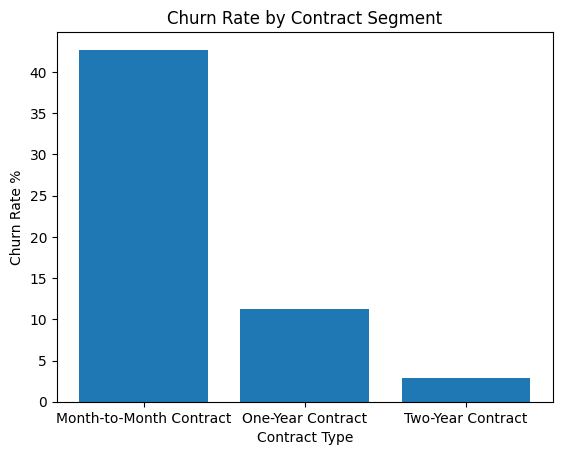

In [ ]:
plt.bar(contract, contract_rates)
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate %')
plt.title('Churn Rate by Contract Segment')
plt.show()

**Tasks 4: Churn Prediction Model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score

le = LabelEncoder()
for col in ['customerID','gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
            'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
            'tenure_segment','charges_segment','contract_segment','Churn']:
    df[col] = le.fit_transform(df[col])

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.drop('Churn_Yes_Num', axis=1), df['Churn_Yes_Num'], test_size=0.25, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

Accuracy: 1.0
AUC-ROC: 1.0


Accuracy: 0.7279954571266326
AUC-ROC: 0.5


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


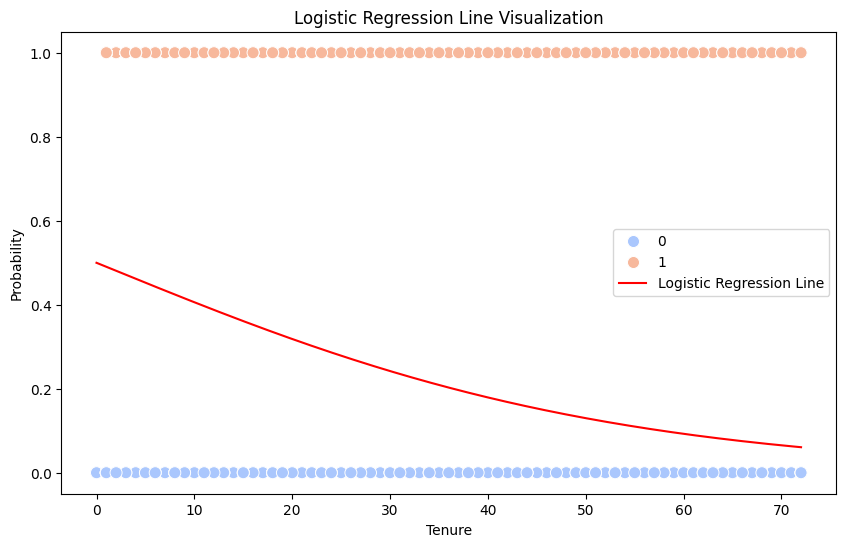

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score

# Split data
X_train, X_test, y_train, y_test = train_test_split(df[['tenure']], df['Churn_Yes_Num'], test_size=0.25, random_state=42)

# Train logistic regression model
model = LogisticRegression(max_iter=5)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('AUC-ROC:', roc_auc_score(y_test, y_pred))

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='Churn_Yes_Num', hue='Churn_Yes_Num', data=df, palette='coolwarm', marker='o', s=75)

# Plot the logistic regression line
X_range = np.linspace(X_test['tenure'].min(), X_test['tenure'].max(), 300).reshape(-1, 1)
y_proba = model.predict_proba(X_range)[:, 1]
plt.plot(X_range, y_proba, color='red', label='Logistic Regression Line')

# Add labels and legend
plt.xlabel('Tenure')
plt.ylabel('Probability')
plt.legend()
plt.title('Logistic Regression Line Visualization')
plt.show()

In [ ]:
for col in df.columns:
    if df[col].isnull().any():
        print(f"Column '{col}' has NaN values.")

In [ ]:
from sklearn.metrics import accuracy_score

# Step 1: Make predictions on the test set using the tuned model
y_pred_test = model.predict(X_test)

# Step 2: Calculate the test accuracy
test_accuracy = accuracy_score(y_test, y_pred_test)

# Step 3: Print the test accuracy
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.73


**LTV**

In [ ]:
def calculate_ltv(dataframe):
    # Filter data for active customers (not churned)
    active_customers = dataframe[df['Churn'] == 0]

    apv = active_customers['MonthlyCharges'].mean()
    pf = active_customers['customerID'].count() / active_customers['customerID'].nunique()
    rp = 1 / (1 - (df['Churn'].sum() / df['customerID'].nunique()))
    ltv = apv * pf * rp
    return ltv

ltv_result = calculate_ltv(df)
print(f"Customer Lifetime Value (LTV): ${ltv_result:.2f}")


Customer Lifetime Value (LTV): $83.40


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[['tenure', 'MonthlyCharges', 'Contract', 'TechSupport', 'StreamingTV']]
y = df['Churn']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

# Identify high-value customers at risk of churning
df['Churn_Predicted'] = model.predict(X)
threshold_value = 0.5  # Adjust this threshold based on your business context

high_value_churn_risk_customers = df[(df['Churn_Predicted'] == 1) & (df['MonthlyCharges'] > threshold_value)]

high_value_churn_risk_customers

              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1036
           1       0.57      0.48      0.52       373

    accuracy                           0.77      1409
   macro avg       0.70      0.67      0.68      1409
weighted avg       0.76      0.77      0.76      1409



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaymentMethod,MonthlyCharges,Churn,Churn_No,Churn_Yes,Churn_Yes_Num,tenure_segment,charges_segment,contract_segment,Churn_Predicted
2,2564,1,0,0,0,2,1,0,0,2,...,3,53.85,1,0,1,1,1,2,0,1
4,6511,0,0,0,0,2,1,0,1,0,...,2,70.70,1,0,1,1,1,2,0,1
5,6551,0,0,0,0,8,1,2,1,0,...,2,99.65,1,0,1,1,0,2,0,1
8,5604,0,0,1,0,28,1,2,1,0,...,2,104.80,1,0,1,1,0,0,0,1
13,174,1,0,0,0,49,1,2,1,0,...,0,103.70,1,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7021,1155,1,0,0,0,12,1,0,0,0,...,2,59.80,1,0,1,1,0,2,1,1
7026,6201,0,0,0,0,9,1,0,0,0,...,0,44.20,1,0,1,1,0,1,0,1
7032,4893,1,1,0,0,1,1,2,1,0,...,2,75.75,1,0,1,1,1,2,0,1
7036,5504,0,0,0,0,12,0,1,0,0,...,2,60.65,0,1,0,0,0,2,1,1


1. MonthlyCharges: 0.5208
2. tenure: 0.2933
3. Contract: 0.1155
4. TechSupport: 0.0548
5. StreamingTV: 0.0155


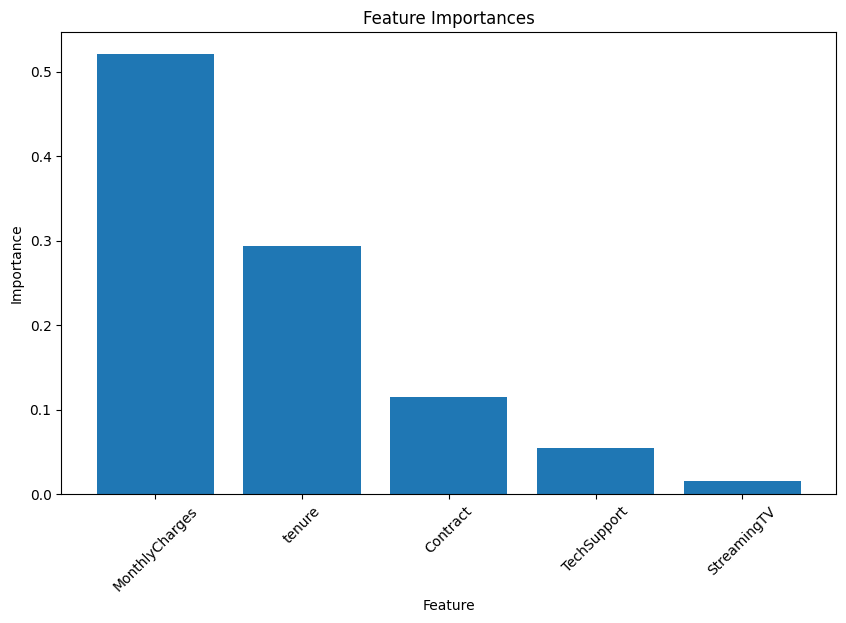

In [ ]:
importances = model.feature_importances_

feature_names = X.columns
sorted_indices = np.argsort(importances)[::-1]
for i, idx in enumerate(sorted_indices):
    feature_name = feature_names[idx]
    importance = importances[idx]
    print(f"{i + 1}. {feature_name}: {importance:.4f}")

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), [feature_names[i] for i in sorted_indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()

In [ ]:
print("The total high_value_churn_risk_customers are:", high_value_churn_risk_customers['customerID'].count())

The total high_value_churn_risk_customers are: 1807


Task 5: Model evaluation

ROC AUC: 1.0


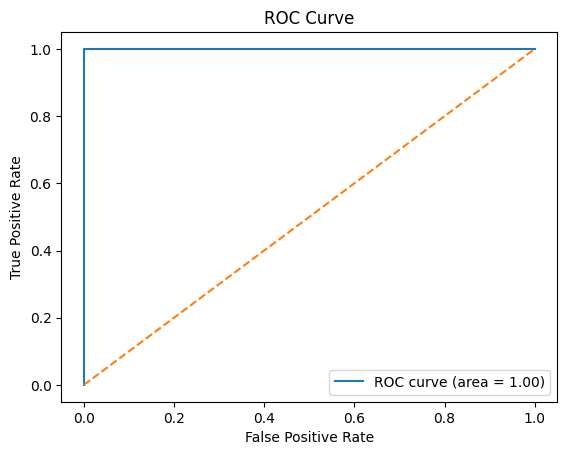

Feature importances:
                  Importance
customerID          0.000310
gender              0.000018
SeniorCitizen       0.000110
Partner             0.000022
Dependents          0.000147
tenure              0.008941
PhoneService        0.000094
MultipleLines       0.000066
InternetService     0.001766
OnlineSecurity      0.013039
OnlineBackup        0.000834
DeviceProtection    0.001840
TechSupport         0.009987
StreamingTV         0.000015
StreamingMovies     0.000058
Contract            0.006793
PaperlessBilling    0.000729
PaymentMethod       0.001036
MonthlyCharges      0.002019
Churn_No            0.256570
Churn_Yes           0.282147
Churn_Yes_Num       0.254564
tenure_segment      0.003167
charges_segment     0.000205
contract_segment    0.027764
Churn_Predicted     0.127758


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt


# Split the data into training and testing sets
X = df.drop("Churn", axis=1)
y = df["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
# Replace "model" with the name of your best-performing model
model = model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Use predicted probabilities for ROC curve
y_pred_binary = model.predict(X_test)

# Evaluate the model's performance
roc_auc = roc_auc_score(y_test, y_pred_proba)
print("ROC AUC:", roc_auc)

# Create a ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Interpret model coefficients or feature importances
# This will vary depending on the type of model you use
if hasattr(model, "coef_"):
    coefs = pd.DataFrame(model.coef_, columns=X.columns)
    print("Model coefficients:")
    print(coefs.to_string())
elif hasattr(model, "feature_importances_"):
    importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=["Importance"])
    print("Feature importances:")
    print(importances.to_string())


Task 6: Bussiness Recommedations

# **Campaigns for Targeted Marketing:**

Customer segmentation should be used, taking into account important variables such as tenure, contract type, and usage patterns.
Demographic Targeting: Start focusing marketing efforts, like exclusive offers or content, on particular groups of people who have been determined to be high-value or at-risk of leaving.

**Offers for Retention:**

Loyalty Programs: To encourage customer retention, introduce and advertise loyalty programs that offer special benefits to loyal customers.
Contract Extensions: Provide customers, particularly those who are deemed to be high-value, with discounts or extra services in exchange for their willingness to extend their contract.

**Improvements to Products/Services:**

Enhancements to Features: Determine and introduce new features or service improvements in response to consumer input and preferences.
Bundle Offerings: Make eye-catching packages or bundles to entice clients to use several services, thereby raising the average customer value.

**Strategies for Dynamic Pricing:**

Investigate your options for flexible pricing, such as yearly payment discounts or customized pricing schemes based on the needs of specific clients.
